# Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
import warnings 
warnings.filterwarnings('ignore')
from datasist.structdata import detect_outliers

# Collect Data

In [2]:
df = pd.read_csv(r"E:\Data Science\Datasets\pharma-data.csv")
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


# Data Overview

In [3]:
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,"Zieme, Doyle and Kunze",Lublin,Poland,51.2333,22.5667,Hospital,Private,Topipizole,Mood Stabilizers,4.0,368,1472.0,January,2018,Mary Gerrard,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
2,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
3,Gottlieb-Cruickshank,Barton Ltd Pharma Plc,Czeladź,Poland,50.3333,19.0833,Hospital,Private,Lioletine Refliruvax,Analgesics,6.0,435,2610.0,January,2018,Mary Gerrard,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta


In [4]:
df.info()
#We found that there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254082 entries, 0 to 254081
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Distributor        254082 non-null  object 
 1   Customer Name      254082 non-null  object 
 2   City               254082 non-null  object 
 3   Country            254082 non-null  object 
 4   Latitude           254082 non-null  float64
 5   Longitude          254082 non-null  float64
 6   Channel            254082 non-null  object 
 7   Sub-channel        254082 non-null  object 
 8   Product Name       254082 non-null  object 
 9   Product Class      254082 non-null  object 
 10  Quantity           254082 non-null  float64
 11  Price              254082 non-null  int64  
 12  Sales              254082 non-null  float64
 13  Month              254082 non-null  object 
 14  Year               254082 non-null  int64  
 15  Name of Sales Rep  254082 non-null  object 
 16  Ma

# Summary Statistics

In [5]:
#Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,254082.0,50.962222,1.625526,4.751420e+01,49.8056,51.1333,52.0833,5.478190e+01
Longitude,254082.0,10.803212,4.143311,6.083800e+00,7.8911,9.3978,12.1333,2.356670e+01
Quantity,254082.0,112.872139,744.310385,-7.200000e+03,5.0000,20.0000,50.0000,1.176000e+05
Price,254082.0,412.207720,224.963687,2.200000e+01,195.0000,430.0000,605.0000,7.940000e+02
Sales,254082.0,46437.715549,349191.838308,-4.161600e+06,1704.0000,5850.0000,21565.2500,7.420560e+07
Year,254082.0,2018.385187,1.041352,2.017000e+03,2018.0000,2018.0000,2019.0000,2.020000e+03


In [6]:
#For Categorical Data
df.describe(include='object').T

,count,unique,top,freq
Distributor,254082,29,Gerlach LLC,111364
Customer Name,254082,751,"Spinka, Schowalter and Conn",440
City,254082,749,Friedberg,796
Country,254082,2,Germany,213598
Channel,254082,2,Pharmacy,129971
Sub-channel,254082,4,Retail,68351
Product Name,254082,240,Diprotaine,1143
Product Class,254082,6,Antiseptics,52037
Month,254082,12,November,23323
Name of Sales Rep,254082,13,Sheila Stones,19655


# EDA

In [7]:
df['Channel'].unique()

array(['Hospital', 'Pharmacy'], dtype=object)

In [8]:
#Our focus on pharmacies only
df=df[df['Channel']=='Pharmacy'].reset_index(drop=True)
df.head()

,Distributor,Customer Name,City,Country,Latitude,Longitude,Channel,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Name of Sales Rep,Manager,Sales Team
0,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,53.4167,18.4333,Pharmacy,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018,Jessica Smith,Britanny Bold,Delta
1,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,50.0833,18.5000,Pharmacy,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018,Steve Pepple,Tracy Banks,Bravo
2,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,53.7800,20.4942,Pharmacy,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018,Anne Wu,Britanny Bold,Delta
3,Gottlieb-Cruickshank,"Blick, Pacocha and Schowalter",Inowrocław,Poland,52.7958,18.2611,Pharmacy,Retail,Symbitrim,Analgesics,20.0,536,10720.0,January,2018,Sheila Stones,Britanny Bold,Delta
4,Gottlieb-Cruickshank,Leuschke PLC Pharmacy,Ciechanów,Poland,52.8817,20.6106,Pharmacy,Retail,Morphizolid Tianalin,Mood Stabilizers,5.0,742,3710.0,January,2018,Mary Gerrard,Britanny Bold,Delta


In [9]:
#We can get rid of channel column now because all of the data about pharmacies
df.drop(columns='Channel',inplace=True)

In [10]:
df.columns 

Index(['Distributor', 'Customer Name', 'City', 'Country', 'Latitude',
       'Longitude', 'Sub-channel', 'Product Name', 'Product Class', 'Quantity',
       'Price', 'Sales', 'Month', 'Year', 'Name of Sales Rep', 'Manager',
       'Sales Team'],
      dtype='object')

In [11]:
#Drop unnecessary columns
df.drop(columns=['Latitude','Longitude','Name of Sales Rep','Manager', 'Sales Team'],inplace=True)

In [12]:
df.head()

,Distributor,Customer Name,City,Country,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year
0,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,Retail,Choriotrisin,Antibiotics,7.0,591,4137.0,January,2018
1,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Institution,Acantaine,Antibiotics,30.0,66,1980.0,January,2018
2,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Retail,Oxymotroban Fexoformin,Analgesics,20.0,458,9160.0,January,2018
3,Gottlieb-Cruickshank,"Blick, Pacocha and Schowalter",Inowrocław,Poland,Retail,Symbitrim,Analgesics,20.0,536,10720.0,January,2018
4,Gottlieb-Cruickshank,Leuschke PLC Pharmacy,Ciechanów,Poland,Retail,Morphizolid Tianalin,Mood Stabilizers,5.0,742,3710.0,January,2018


In [13]:
#Search for duplicates
df.duplicated().sum()

62

In [14]:
#Remove them
df.drop_duplicates(inplace=True)

In [15]:
#We found cancelled transictions and uncomplete one from describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,129909.0,115.601547,801.734156,-7200.0,5.0,20.0,50.0,117600.0
Price,129909.0,412.401158,224.708205,22.0,195.0,435.0,605.0,794.0
Sales,129909.0,47864.301031,390451.593862,-2433600.0,1725.0,5950.0,22068.0,74205600.0
Year,129909.0,2018.392806,1.047802,2017.0,2018.0,2018.0,2019.0,2020.0


In [16]:
df[(df['Quantity']<=0) | (df['Sales']<=0)]
#By default if the quantity=0 the sales will be also 0

,Distributor,Customer Name,City,Country,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year
2075,Prohaska-Kuhic,Ritchie-Rodriguez Pharm,Łuków,Poland,Retail,Sodinel Olofribrate,Antimalarial,0.0,50,0.0,March,2018
4077,Stehr-Champlin,"Parisian, Hagenes and Skiles Pharma Plc",Ciechocinek,Poland,Retail,Sevotrana Tiafoxin,Analgesics,0.0,460,0.0,June,2018
4265,Lindgren-Simonis Pharm,Hermiston and Sons Pharma Plc,Bochnia,Poland,Institution,Diprolimus,Antiseptics,0.0,634,0.0,June,2018
6506,Rohan,Koss-Beier,Nakło nad Notecią,Poland,Retail,Saprodeine Zanprosyn,Antibiotics,0.0,215,0.0,September,2018
6602,Prohaska-Kuhic,Heidenreich Group Pharmaceutical Ltd,Rzeszów,Poland,Institution,Thionide,Analgesics,0.0,113,0.0,September,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
129634,Koss,Abernathy Group Pharmacy,Melle,Germany,Retail,Flutacerol,Analgesics,-300.0,745,-223500.0,December,2020
129800,Koss,Leffler-Russel Pharmaceutical Ltd,Lingen,Germany,Retail,Diaxolol,Antiseptics,-1.0,765,-765.0,December,2020
129804,Koss,Wehner-Stehr,Steinfurt,Germany,Institution,Pazofenac,Mood Stabilizers,-50.0,123,-6150.0,December,2020
129811,Koss,Kreiger Inc,Burgdorf,Germany,Retail,Docstryl Rivacin,Antiseptics,-660.0,789,-520740.0,December,2020


In [17]:
#We get the status of transactions of each row 
df['Transaction Status'] = np.where(df['Quantity']<=0,'Cancelled','Completed')

In [18]:
df['Transaction Status'].unique()

array(['Completed', 'Cancelled'], dtype=object)

In [19]:
#Isolate our data from cancelled transcations
cancelled = df[df['Transaction Status']=='Cancelled']
df = df[df['Transaction Status']=='Completed']

In [20]:
df['Transaction Status'].unique()

array(['Completed'], dtype=object)

In [21]:
#Transform quantities to integers because it's unlogical to have a pack and half!
df['Quantity'] = df['Quantity'].astype(int)

In [22]:
df['Sales'] = df.apply(lambda x : x['Quantity']*x['Price'] ,axis=1).astype(int)

In [23]:
df.head()

,Distributor,Customer Name,City,Country,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Transaction Status
0,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,Retail,Choriotrisin,Antibiotics,7,591,4137,January,2018,Completed
1,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Institution,Acantaine,Antibiotics,30,66,1980,January,2018,Completed
2,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Retail,Oxymotroban Fexoformin,Analgesics,20,458,9160,January,2018,Completed
3,Gottlieb-Cruickshank,"Blick, Pacocha and Schowalter",Inowrocław,Poland,Retail,Symbitrim,Analgesics,20,536,10720,January,2018,Completed
4,Gottlieb-Cruickshank,Leuschke PLC Pharmacy,Ciechanów,Poland,Retail,Morphizolid Tianalin,Mood Stabilizers,5,742,3710,January,2018,Completed


In [24]:
#Top 10 Distributors
df['Distributor'].value_counts().head(10).reset_index()

,Distributor,count
0,Gerlach LLC,57026
1,Koss,29596
2,Erdman,13577
3,Stehr-Champlin,5767
4,Smith Inc,3205
5,Gottlieb-Cruickshank,3028
6,Prohaska-Kuhic,2828
7,Kozey-Emmerich,2267
8,Beier,1593
9,Welch-Langworth,1579


<Axes: xlabel='Distributor', ylabel='count'>

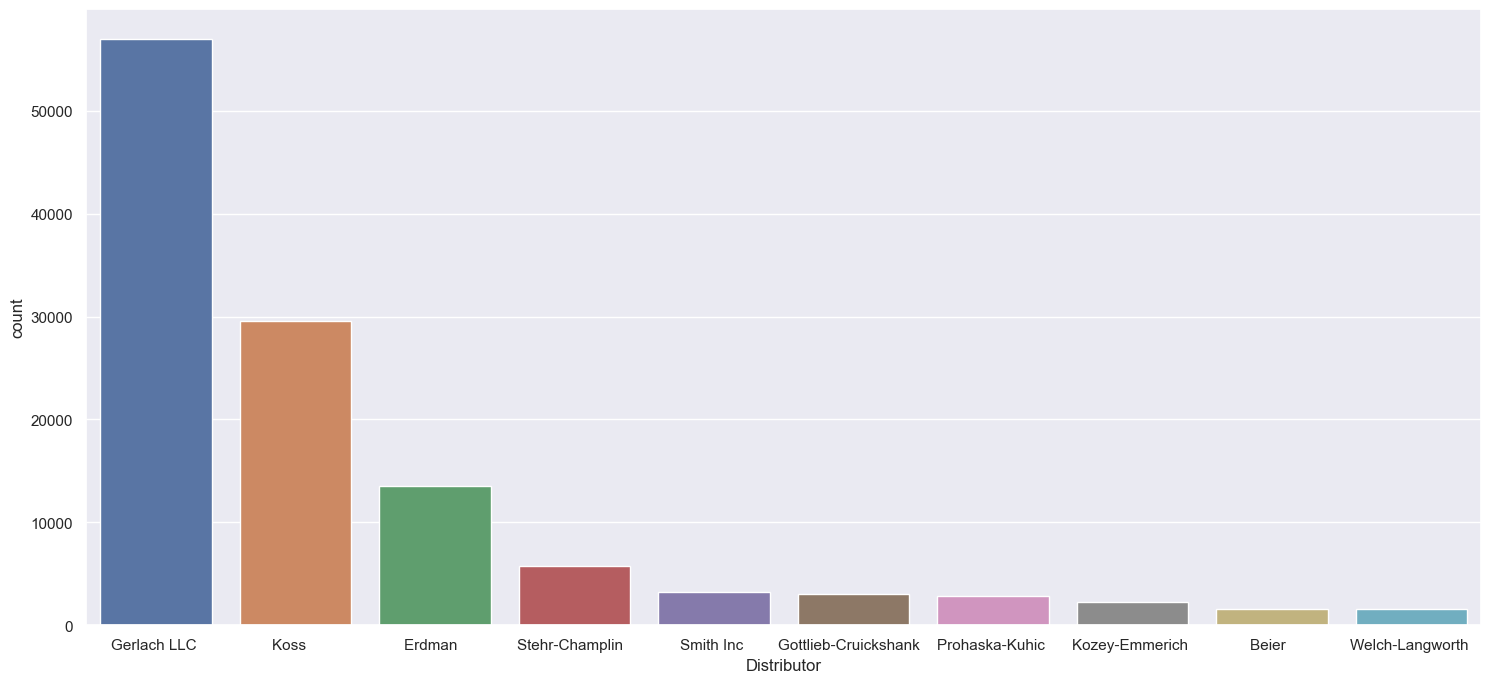

In [25]:
sns.barplot(data=df['Distributor'].value_counts().head(10).reset_index(),x='Distributor',y='count')

In [26]:
#Top 10 Customer Name
df['Customer Name'].value_counts().head(10).reset_index()

,Customer Name,count
0,"Spinka, Schowalter and Conn",434
1,D'Amore and Sons Pharm,423
2,McDermott Inc Pharma Plc,423
3,Mayert-Weber Pharmaceutical Ltd,422
4,Kris LLC Pharm,422
5,"Haag, Bradtke and Terry",422
6,Beier PLC Pharm,421
7,Rogahn-Klein Pharma Plc,418
8,Armstrong Inc Pharma Plc,417
9,Schimmel-Waelchi Pharmaceutical Limited,417


<Axes: xlabel='count', ylabel='Customer Name'>

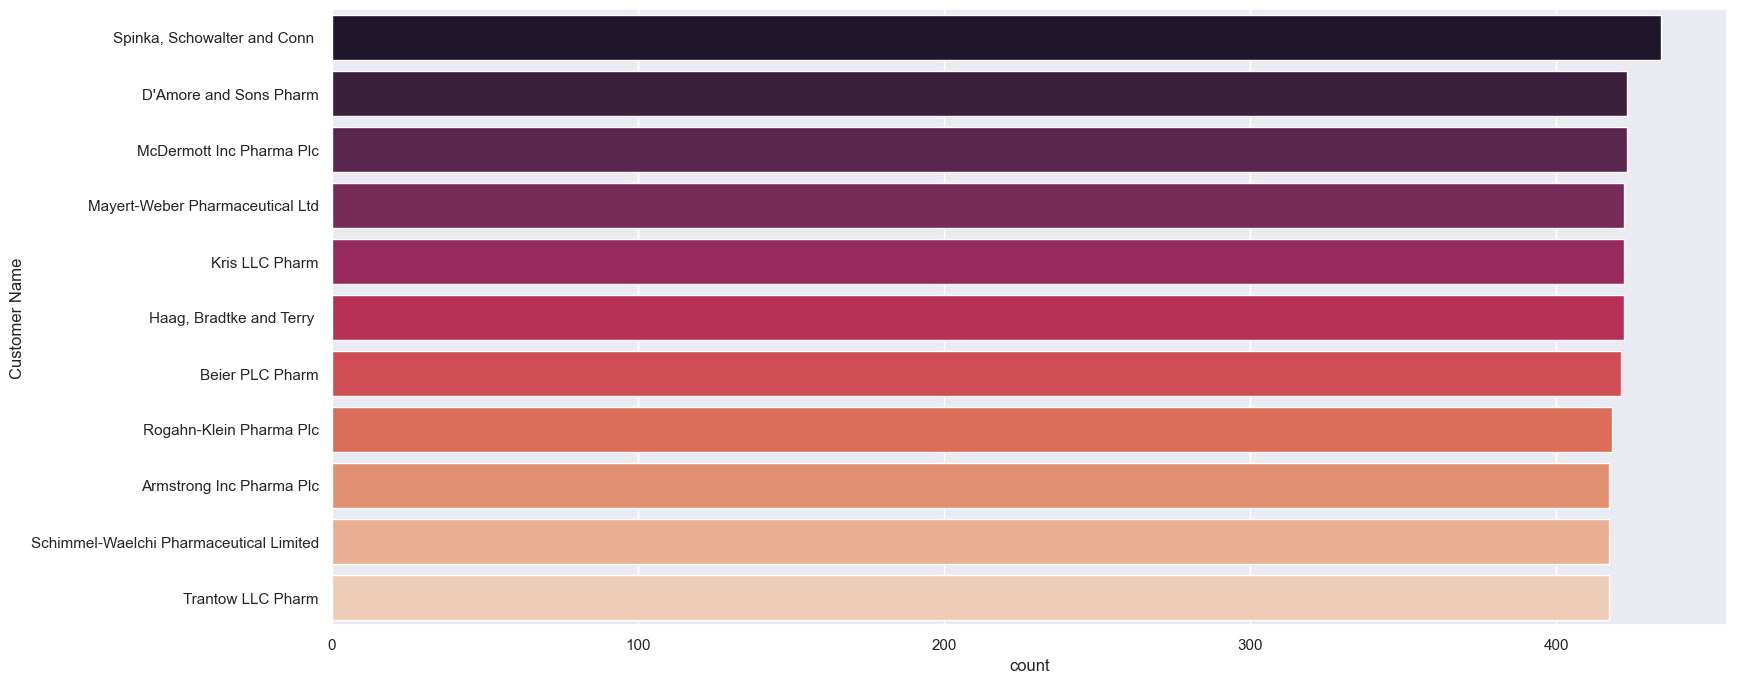

In [27]:
sns.countplot(data=df,
              y='Customer Name',
              order=df['Customer Name'].value_counts(ascending=False).index[:11],
             palette='rocket')

In [28]:
#Most sales by city
df.City.value_counts().head(10)

City
Friedberg                  786
Bergheim                   434
Staßfurt                   423
Görlitz                    423
Zeitz                      422
Apolda                     422
Osterholz-Scharmbeck       422
Hückelhoven                421
Leinfelden-Echterdingen    418
Harsewinkel                417
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='City'>

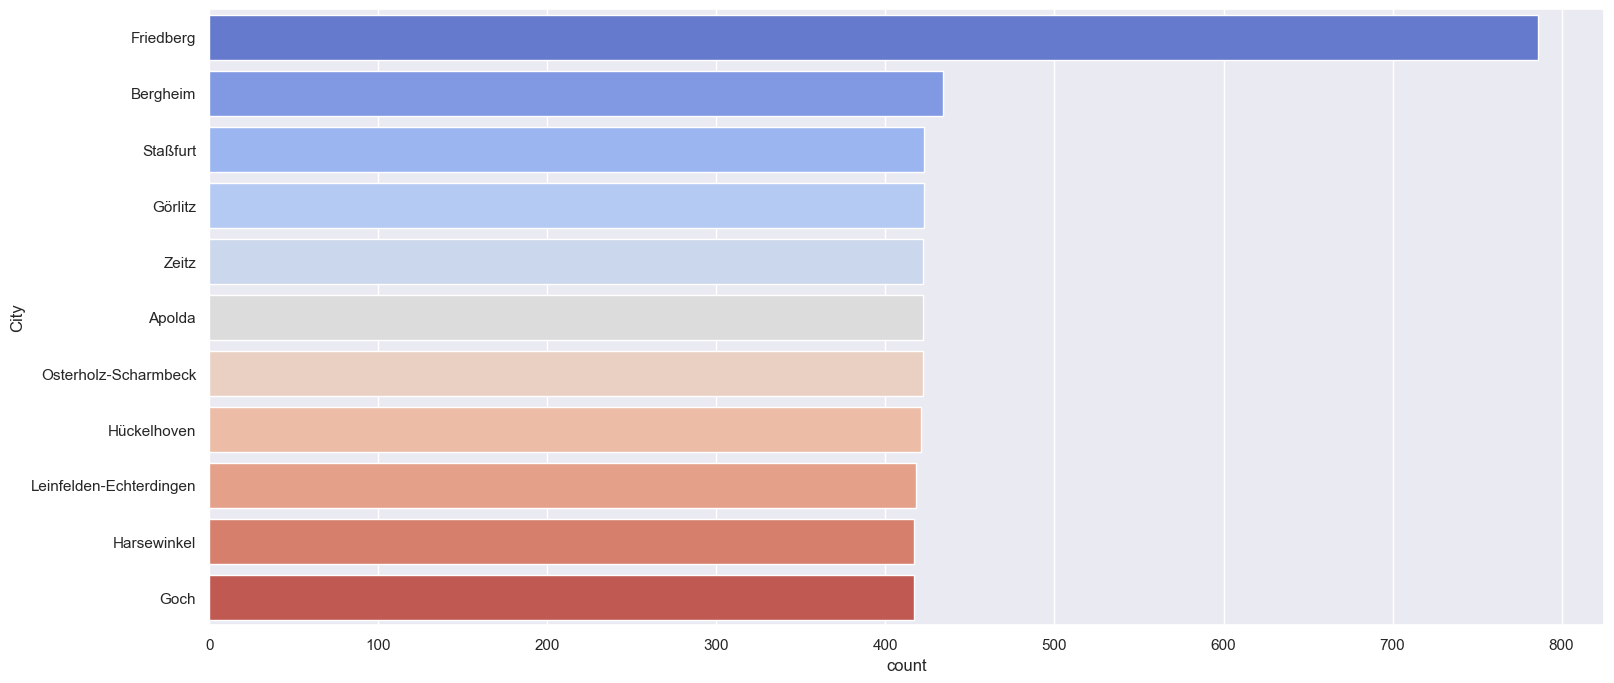

In [29]:
sns.countplot(data=df,
              y='City',
              order=df['City'].value_counts(ascending=False).index[:11],palette='coolwarm')

<Axes: xlabel='Country', ylabel='count'>

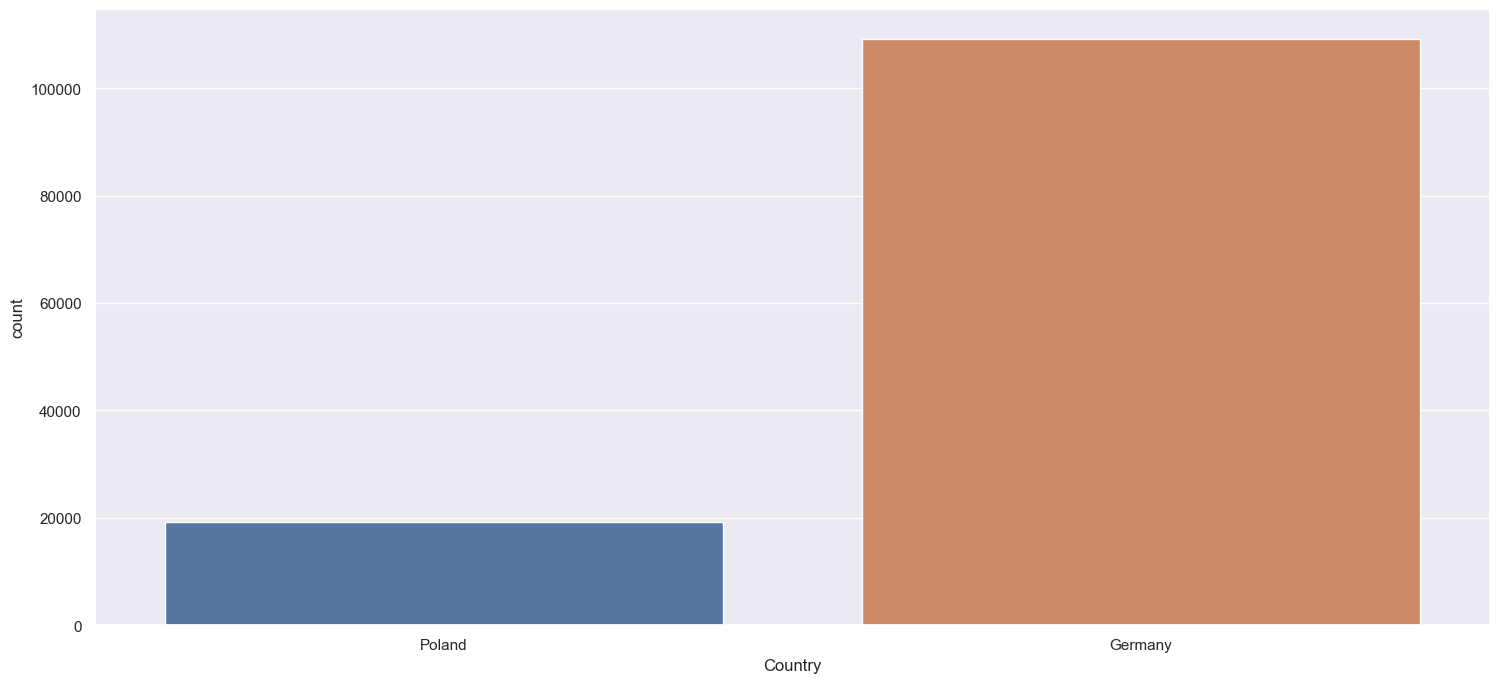

In [30]:
#Most sales by country
sns.countplot(data=df,x='Country')

([<matplotlib.patches.Wedge at 0x20f52d05f10>,
 [Text(-0.4978784441604088, -0.9808756571759801, 'Germany'),
  Text(0.49787839824230545, 0.9808756804833508, 'Poland')],
 [Text(-0.271570060451132, -0.5350230857323527, '85.0%'),
  Text(0.27157003540489383, 0.535023098445464, '15.0%')])

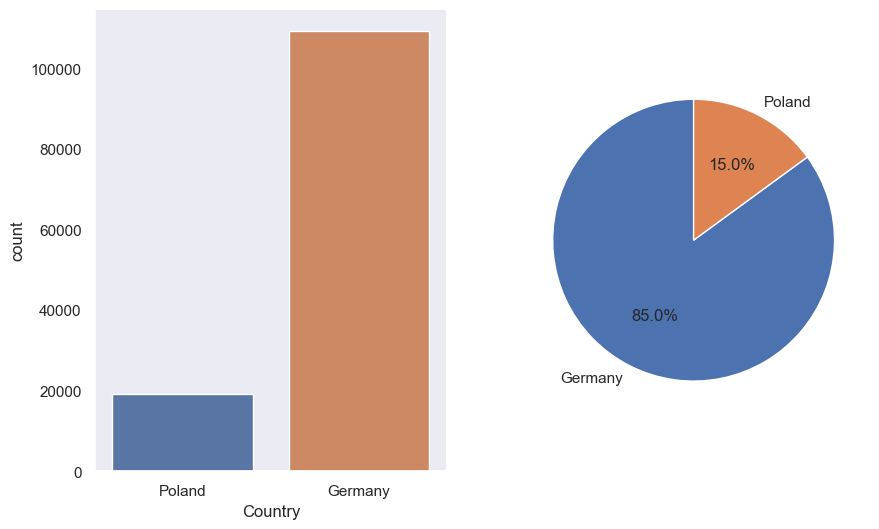

In [31]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.grid(False)
sns.countplot(data=df,x='Country')
plt.subplot(1,2,2)
plt.pie(df['Country'].value_counts().values,
        labels=df['Country'].value_counts().index,
       autopct='%1.1f%%',
       startangle=90)

In [32]:
#Sub-Channel
df['Sub-channel'].value_counts().values

array([67591, 60936], dtype=int64)

([<matplotlib.patches.Wedge at 0x20f52fc4390>,
 [Text(-1.0963636065583546, -0.08936913457317124, 'Retail'),
  Text(1.0963636065583546, 0.08936913457317111, 'Institution')],
 [Text(-0.5980165126681933, -0.048746800676275216, '52.6%'),
  Text(0.5980165126681933, 0.04874680067627515, '47.4%')])

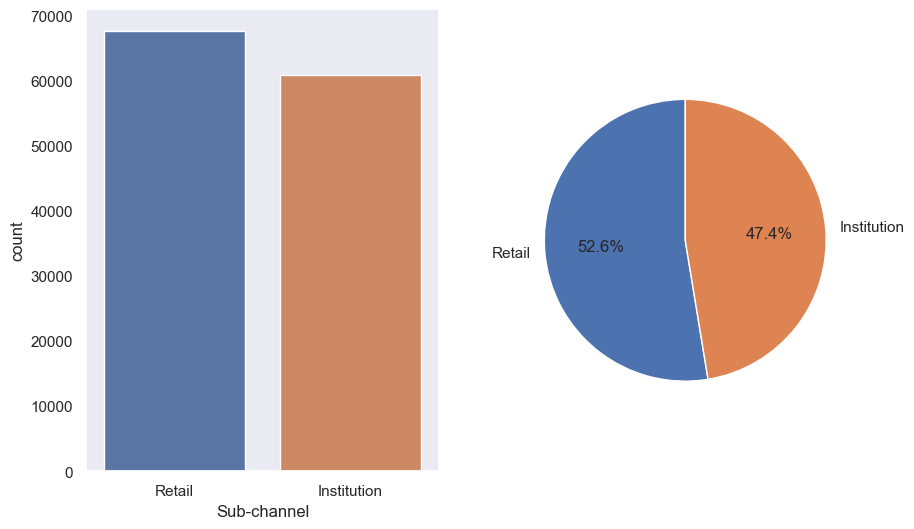

In [33]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.grid(False)
sns.countplot(data=df,x='Sub-channel')
plt.subplot(1,2,2)
plt.pie(df['Sub-channel'].value_counts().values,
        labels=df['Sub-channel'].value_counts().index,
       autopct='%1.1f%%',
       startangle=90)

In [34]:
df['Sub-channel'].value_counts().values

array([67591, 60936], dtype=int64)

In [35]:
df['Product Name'].nunique()
#We have 240 products

240

In [36]:
#Top 10 saled products
df['Product Name'].value_counts().head(10).reset_index()

,Product Name,count
0,Rositroban,592
1,Menogine,589
2,Diprotaine,585
3,Fosinofen,584
4,Aggrakine,579
5,Propratecan,579
6,Nevanide Actozide,579
7,Ibrulinum,576
8,Victomax,576
9,Atomorelin,576


In [37]:
df['Product Class'].nunique()
#We have only 6 categories for drugs here

6

<Axes: xlabel='Product Class', ylabel='count'>

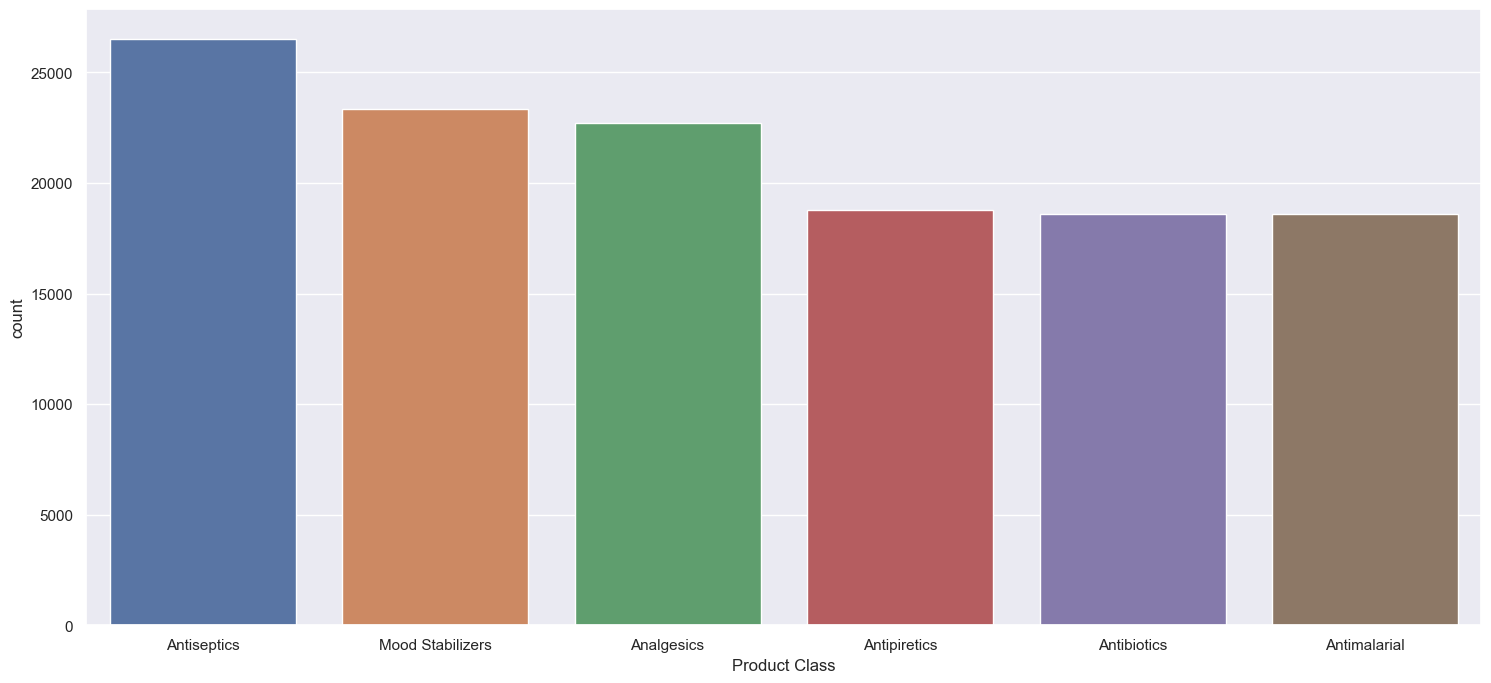

In [38]:
sns.countplot(data=df,x='Product Class',order=df['Product Class'].value_counts().index)

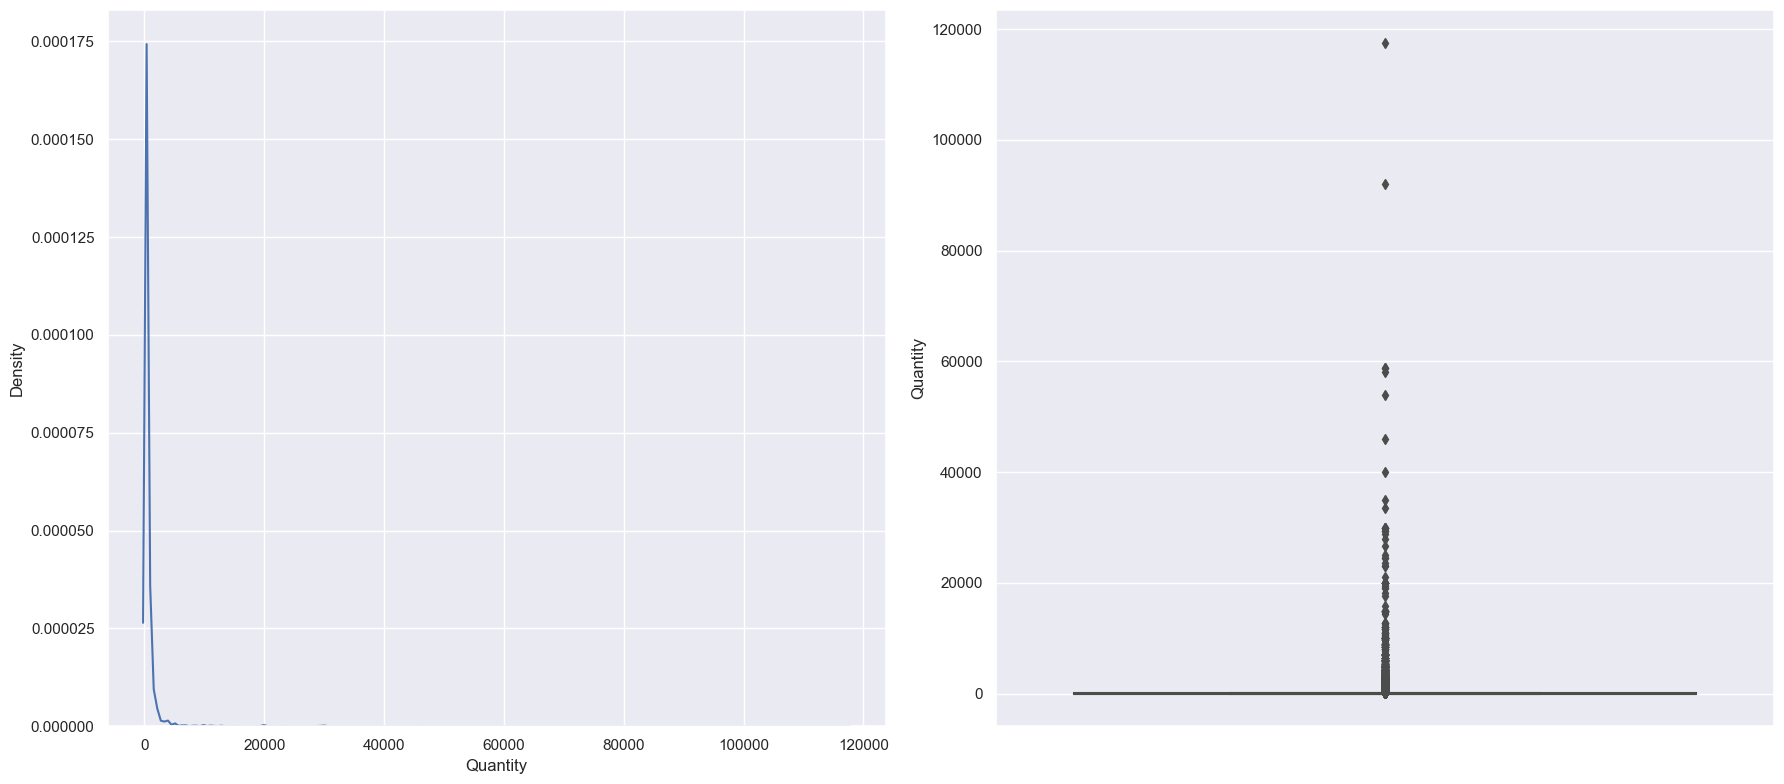

In [39]:
#For Quantities
plt.subplot(1,2,1)
sns.kdeplot(df['Quantity'])
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Quantity')
plt.tight_layout()

<Axes: xlabel='Price'>

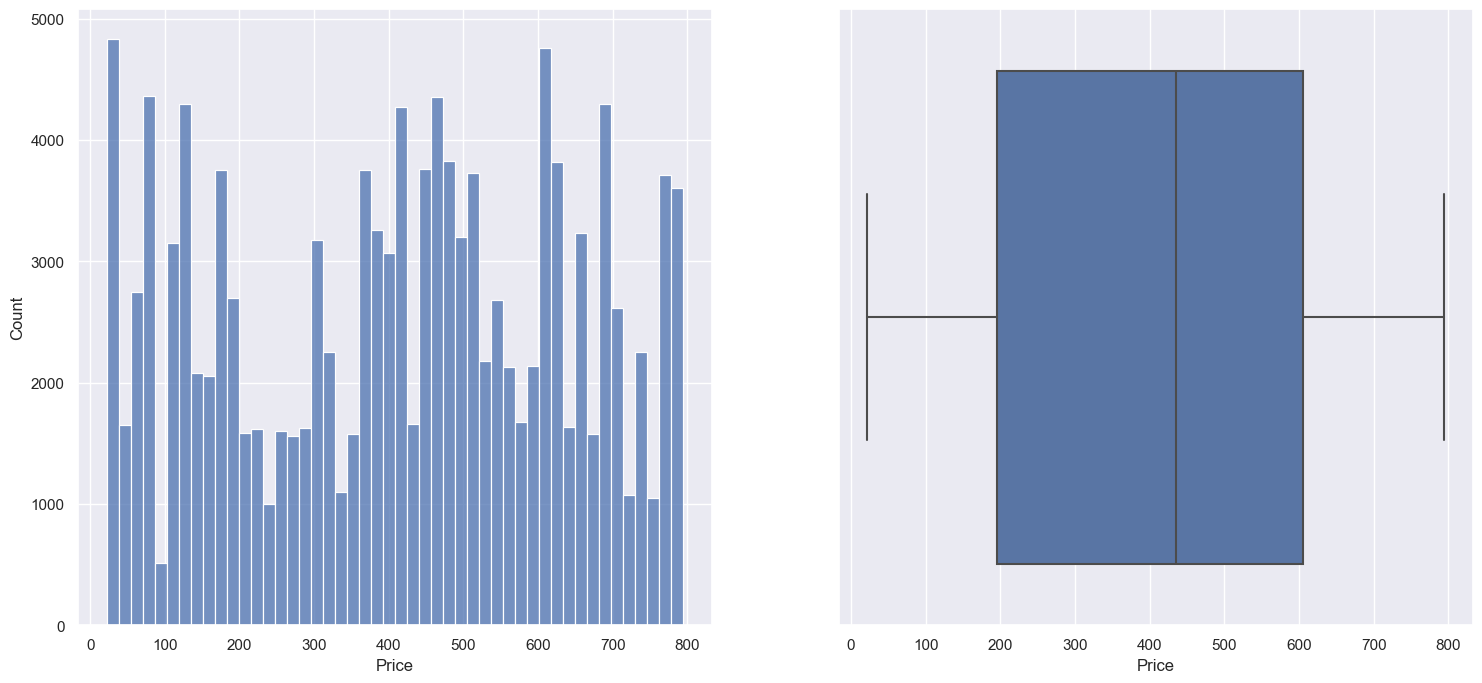

In [40]:
#For prices
plt.subplot(1,2,1)
sns.histplot(data=df,x='Price')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='Price')
#We conclude that there is no outliers in prices of drugs.

<Axes: ylabel='Sales'>

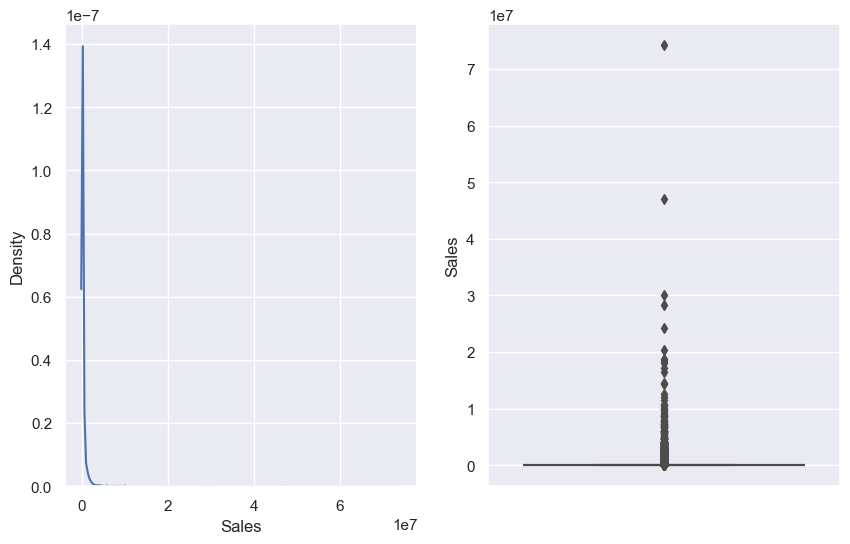

In [41]:
#For Sales
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.kdeplot(df['Sales'])
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Sales')

## We discover a right-skewed distribution and a present of outliers
## So let's get in depth and understand more about outliers
- We need to detect and calculate the percenatge of this outliers
- Outliers : 
- 1-Data entry mistake OR  2-Real values due to some factors

In [42]:
#Detect outliers
outliers_idx = detect_outliers(df,0,['Quantity','Price'])
(len(outliers_idx)/df.shape[0])*100

14.378301835412014

([<matplotlib.patches.Wedge at 0x20f5a409e10>,
 [Text(-0.4801528715598686, -0.9896732894914425, 'No Outliers'),
  Text(0.480152917889818, 0.9896732670138634, 'Outliers')],
 [Text(-0.2619015663053828, -0.5398217942680594, '85.6%'),
  Text(0.26190159157626436, 0.5398217820075618, '14.4%')])

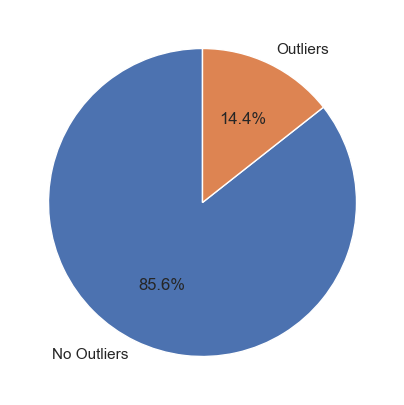

In [43]:
plt.figure(figsize=(5,5))
plt.pie([df.shape[0]-len(outliers_idx),len(outliers_idx)],labels=['No Outliers','Outliers']
       ,autopct='%1.1f%%',
       startangle=90)

In [44]:
df.loc[outliers_idx].Quantity.value_counts().sort_index(ascending=False)

Quantity
117600     1
92000      1
58800      2
58100      1
54000      1
          ..
125       81
124       15
123       10
122       10
121        4
Name: count, Length: 932, dtype: int64

### We see some illogical values such that it's impossible to buy 117,600 packs from one drug per month for one pharmacy!
### So we need to discover the Quantity Vs Sales first

<Axes: xlabel='Quantity', ylabel='Sales'>

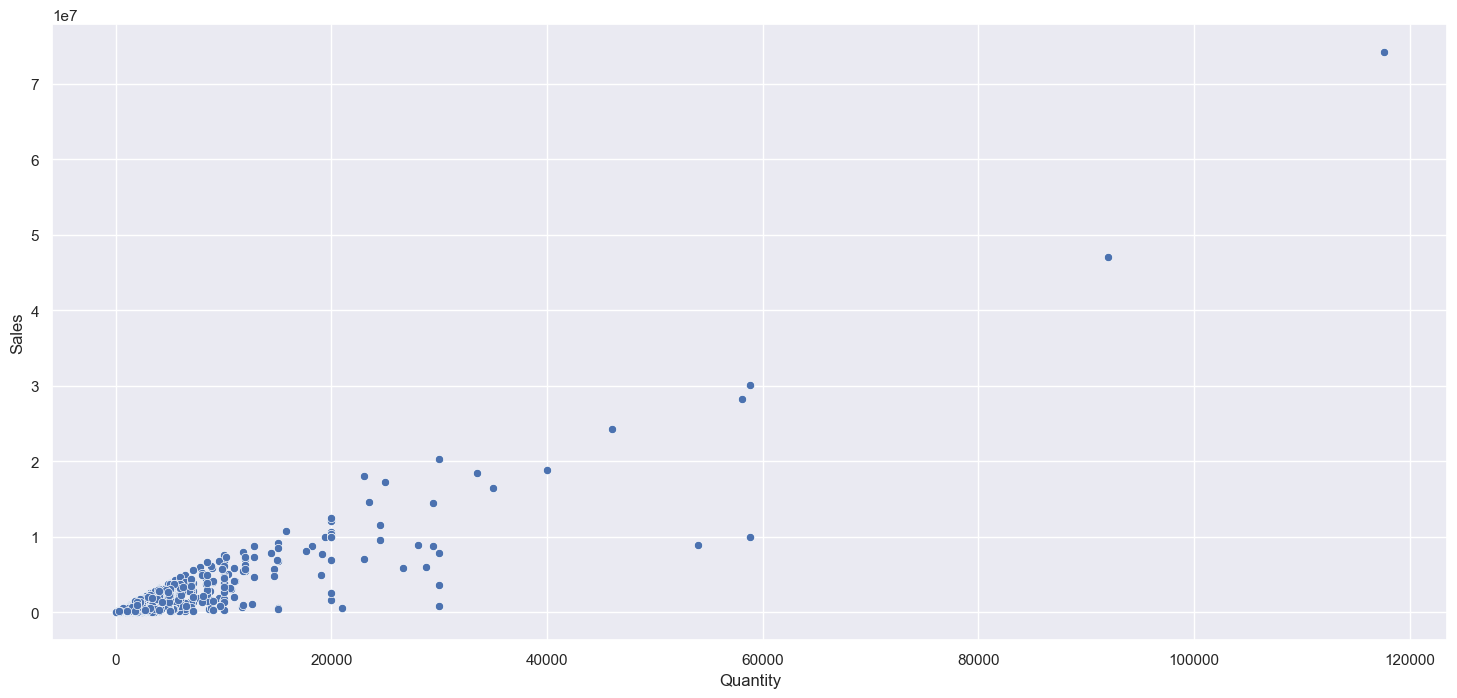

In [45]:
sns.scatterplot(data=df,x='Quantity',y='Sales')

In [46]:
df[['Quantity','Sales']].corr()
#Strong positive correlation between the quantities and sales as expected!

,Quantity,Sales
Quantity,1.00000,0.91728
Sales,0.91728,1.00000


In [47]:
print('Pharmacies demand more than 5,000 for a specific drug per month : ' + str(len(df[df['Quantity']>5000])))
print('Percentage from the whole dataset : ',(len(df[df['Quantity']>5000])/df.shape[0])*100,'%')

Pharmacies demand more than 5,000 for a specific drug per month : 211
Percentage from the whole dataset :  0.1641678402203428 %


In [48]:
outliers = df.loc[outliers_idx]
len(outliers[outliers['Quantity']>5000])

211

### We conclude that:
- All the data that we expect to remove is included in the outliers,so that's a double check for us that these data is illogical
- 211 is a small percentage from the whole dataset (128,279 values),So we can separate them from our dataset if we want to make further analysis about them separately

In [49]:
outlier_quan_df = df[df['Quantity']>5000].reset_index()
df = df[df['Quantity']<5000].reset_index(drop=True)
df.head()

,Distributor,Customer Name,City,Country,Sub-channel,Product Name,Product Class,Quantity,Price,Sales,Month,Year,Transaction Status
0,Gottlieb-Cruickshank,Feest PLC,Świecie,Poland,Retail,Choriotrisin,Antibiotics,7,591,4137,January,2018,Completed
1,Gottlieb-Cruickshank,Medhurst-Beer Pharmaceutical Limited,Rybnik,Poland,Institution,Acantaine,Antibiotics,30,66,1980,January,2018,Completed
2,Gottlieb-Cruickshank,Keeling LLC Pharmacy,Olsztyn,Poland,Retail,Oxymotroban Fexoformin,Analgesics,20,458,9160,January,2018,Completed
3,Gottlieb-Cruickshank,"Blick, Pacocha and Schowalter",Inowrocław,Poland,Retail,Symbitrim,Analgesics,20,536,10720,January,2018,Completed
4,Gottlieb-Cruickshank,Leuschke PLC Pharmacy,Ciechanów,Poland,Retail,Morphizolid Tianalin,Mood Stabilizers,5,742,3710,January,2018,Completed


<Axes: xlabel='Sales', ylabel='Density'>

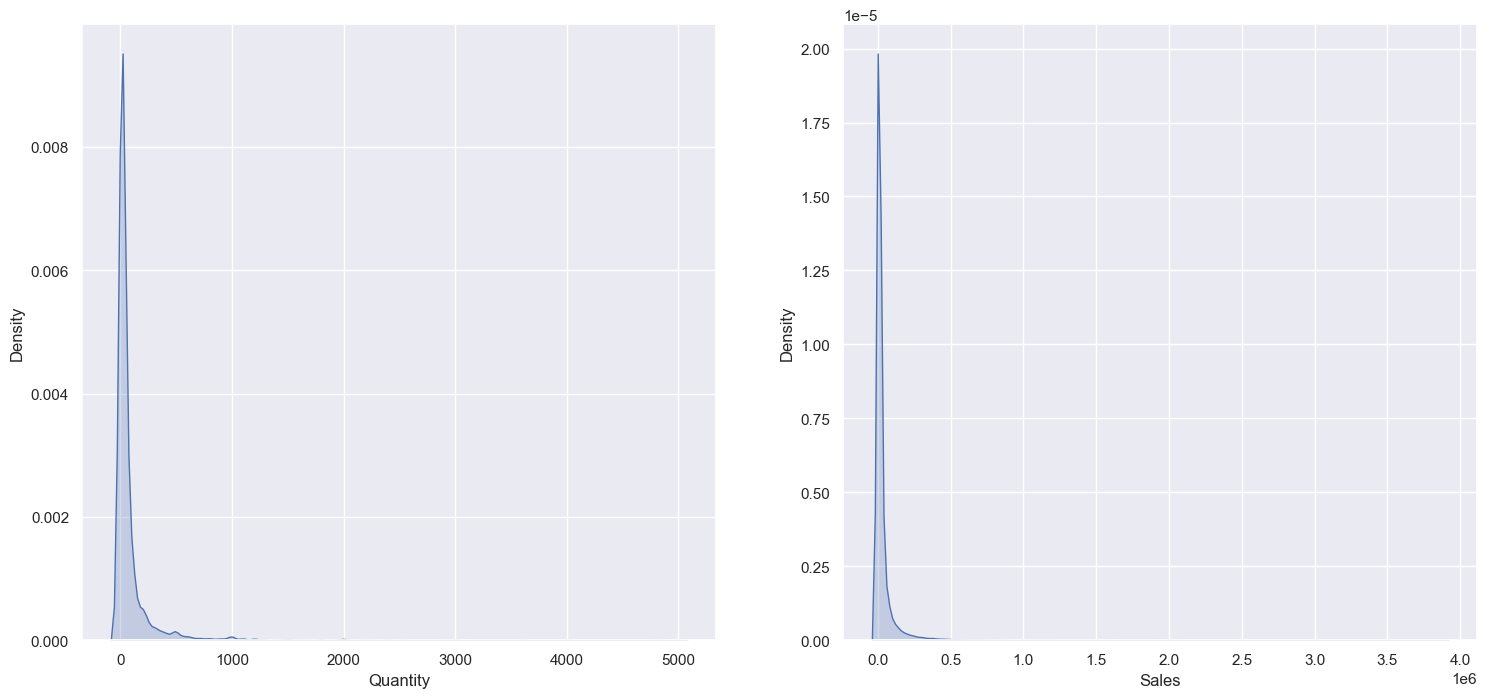

In [50]:
#Now our outliers is logical data but we need to transform them as that can help make 
#the data more symmetric(not skewed) to reduce the impact of extreme values in the ML model.
plt.subplot(1,2,1)
sns.kdeplot(df['Quantity'],shade=True)
plt.subplot(1,2,2)
sns.kdeplot(df['Sales'],shade=True)

In [51]:
#We decide to make a logarithmic transformation as the data is:
#Right-skewed-Includes non-negative values so that's suitable
df['Log Quantity'] = np.log(df['Quantity'])
df['Log Sales'] = np.log(df['Sales'])

<Axes: xlabel='Log Sales'>

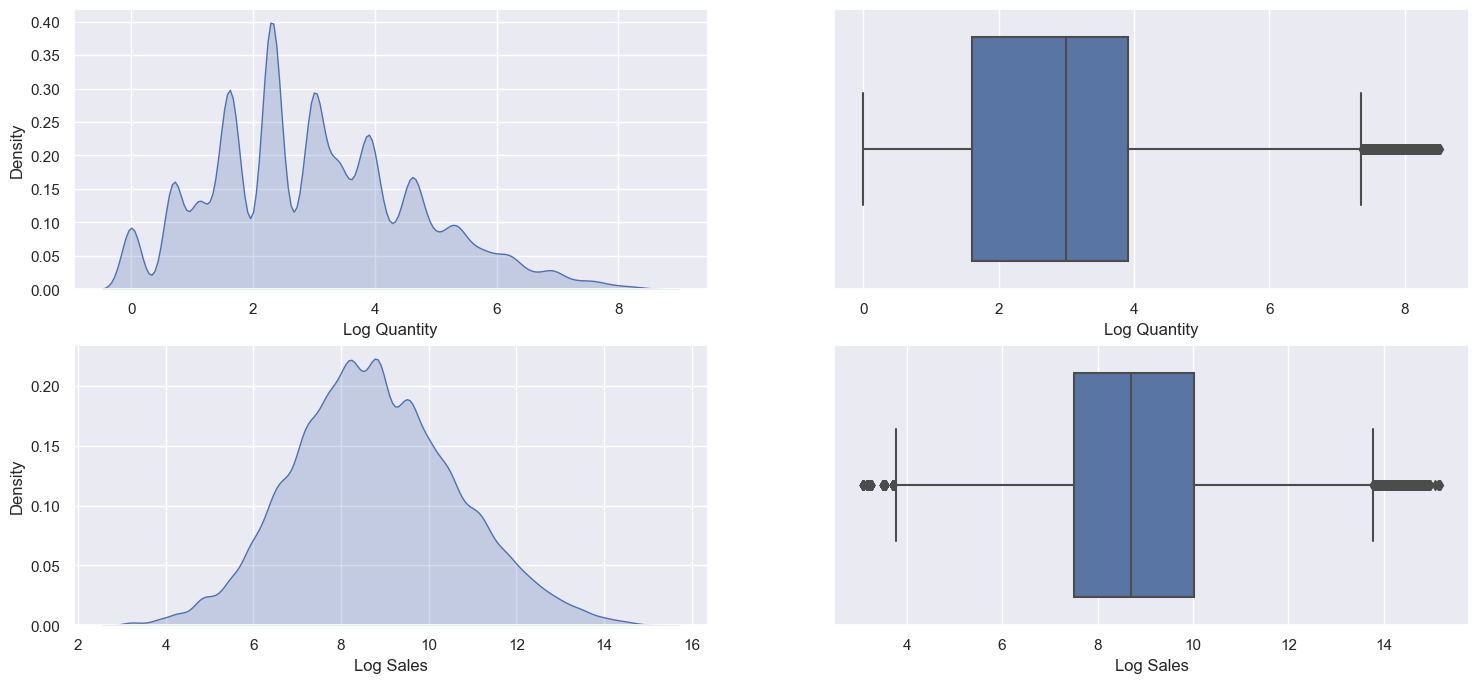

In [52]:
fig,axes = plt.subplots(2,2)
sns.kdeplot(df['Log Quantity'],shade=True,ax=axes[0,0])
sns.boxplot(data=df,x='Log Quantity',ax=axes[0,1])
sns.kdeplot(df['Log Sales'],shade=True,ax=axes[1,0])
sns.boxplot(data=df,x='Log Sales',ax=axes[1,1])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

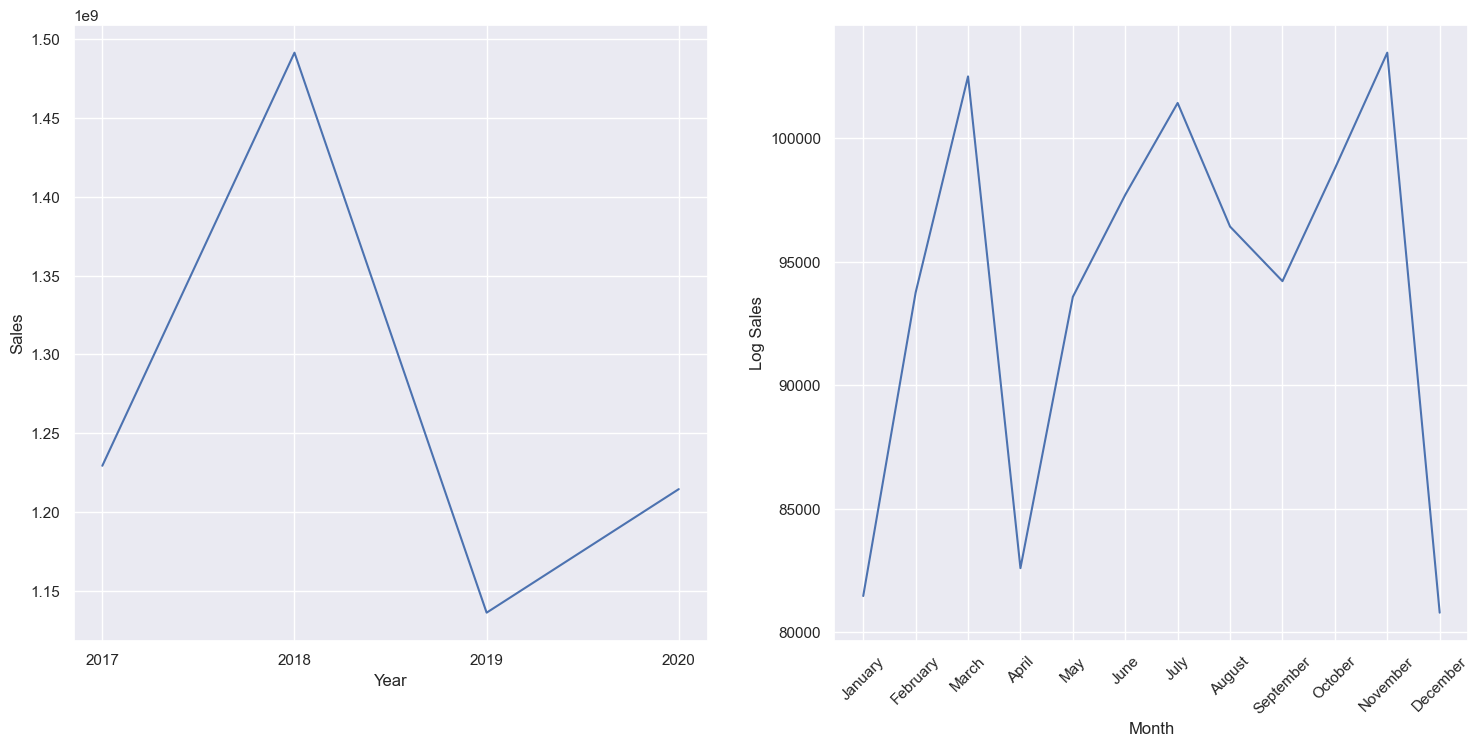

In [53]:
#Describe sales by months and years
plt.subplot(1,2,1)
sns.lineplot(data=df,x='Year',y='Sales',estimator=sum,ci=None)
plt.xticks(np.arange(2017,2021,1))
plt.subplot(1,2,2)
sns.lineplot(data=df,x='Month',y='Log Sales',estimator=sum,ci=None)
plt.xticks(rotation=45)